<a href="https://colab.research.google.com/github/Sneha-P-Karunakaran/Deep-Learning-Projects/blob/main/RNN_TASK_(MILK_PRODUCTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
import os
data=pd.read_csv("/content/monthly-milk-production-pounds.csv",index_col="Month",parse_dates=True)
data

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0
...,...
1975-09,817.0
1975-10,827.0
1975-11,797.0


<Axes: xlabel='Month'>

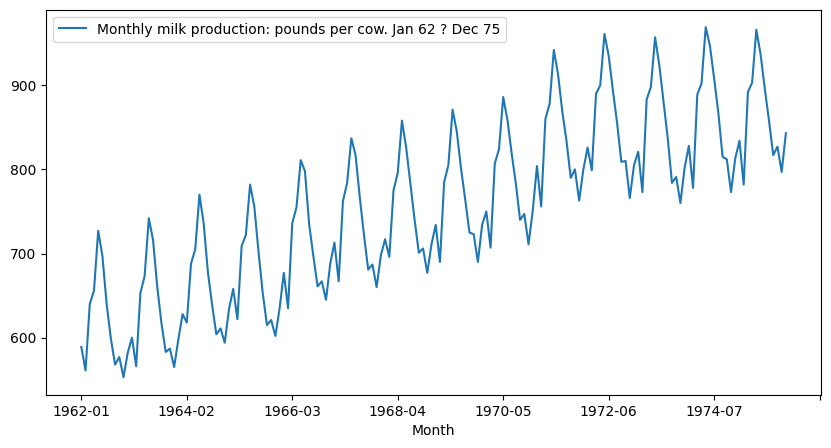

In [ ]:
data.plot(figsize=(10,5))

In [ ]:
#scailing
scaler=MinMaxScaler()

#split
traindata=data[:85]
testdata=data[84:]

scaled_traindata=scaler.fit_transform(traindata)
scaled_testdata=scaler.fit_transform(testdata)

In [ ]:
n_input=12
n_features=1
Generator=TimeseriesGenerator(scaled_traindata,scaled_traindata,length=12,batch_size=1)

In [ ]:
x,y=Generator[0]
print(x.flatten(),y)

[0.11803279 0.02622951 0.2852459  0.33770492 0.5704918  0.47213115
 0.2852459  0.15081967 0.04918033 0.07868852 0.         0.09508197] [[0.15409836]]


In [ ]:
x,y=Generator[1]
print(x.flatten(),y)

[0.02622951 0.2852459  0.33770492 0.5704918  0.47213115 0.2852459
 0.15081967 0.04918033 0.07868852 0.         0.09508197 0.15409836] [[0.04262295]]


In [ ]:
x,y=Generator[2]
print(x.flatten(),y)#normally 3 hidden statements

[0.2852459  0.33770492 0.5704918  0.47213115 0.2852459  0.15081967
 0.04918033 0.07868852 0.         0.09508197 0.15409836 0.04262295] [[0.32786885]]


In [ ]:
#layer
model=Sequential()
model.add(SimpleRNN(100,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(1,activation="tanh"))

In [ ]:
#compile
model.compile(optimizer="adam",loss="mse")

In [ ]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#fitting
trained_history=model.fit(Generator,epochs=30)

Epoch 1/30
73/73 [==============================] - 2s 4ms/step - loss: 0.0324
Epoch 2/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 3/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0131
Epoch 4/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 5/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 6/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 7/30
73/73 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 8/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 9/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 10/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 11/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 12/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 13/30
73/73 [==============================

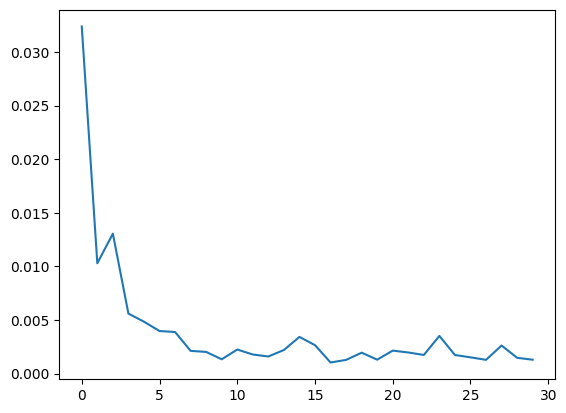

In [ ]:
#plotting
loss=model.history.history["loss"]
plt.plot(range(len(loss)),loss)

In [ ]:
test_prediction=[]
firstbatch=scaled_traindata[-n_input:]
currentbatch=firstbatch.reshape(1,n_input,n_features)
for i in range(len(testdata)):
  currentpredict=model.predict(currentbatch)[0]
  print(currentpredict)
  test_prediction.append(currentpredict)
  currentbatch=np.append(currentbatch[:,1:,:],[[currentpredict]],axis=1)

1/1 [==============================] - 0s 174ms/step
[0.4813355]
1/1 [==============================] - 0s 21ms/step
[0.775886]
1/1 [==============================] - 0s 20ms/step
[0.8268746]
1/1 [==============================] - 0s 21ms/step
[0.92129254]
1/1 [==============================] - 0s 22ms/step
[0.8798661]
1/1 [==============================] - 0s 20ms/step
[0.7320086]
1/1 [==============================] - 0s 21ms/step
[0.60205495]
1/1 [==============================] - 0s 23ms/step
[0.50312877]
1/1 [==============================] - 0s 27ms/step
[0.51921904]
1/1 [==============================] - 0s 22ms/step
[0.44908515]
1/1 [==============================] - 0s 24ms/step
[0.5299115]
1/1 [==============================] - 0s 21ms/step
[0.59701526]
1/1 [==============================] - 0s 21ms/step
[0.5825471]
1/1 [==============================] - 0s 21ms/step
[0.8094571]
1/1 [==============================] - 0s 24ms/step
[0.86696315]
1/1 [============================

In [ ]:
test_prediction

[array([0.4813355], dtype=float32),
 array([0.775886], dtype=float32),
 array([0.8268746], dtype=float32),
 array([0.92129254], dtype=float32),
 array([0.8798661], dtype=float32),
 array([0.7320086], dtype=float32),
 array([0.60205495], dtype=float32),
 array([0.50312877], dtype=float32),
 array([0.51921904], dtype=float32),
 array([0.44908515], dtype=float32),
 array([0.5299115], dtype=float32),
 array([0.59701526], dtype=float32),
 array([0.5825471], dtype=float32),
 array([0.8094571], dtype=float32),
 array([0.86696315], dtype=float32),
 array([0.922901], dtype=float32),
 array([0.86573654], dtype=float32),
 array([0.71732146], dtype=float32),
 array([0.59481084], dtype=float32),
 array([0.5291161], dtype=float32),
 array([0.52347165], dtype=float32),
 array([0.5047698], dtype=float32),
 array([0.5598184], dtype=float32),
 array([0.60296524], dtype=float32),
 array([0.70226467], dtype=float32),
 array([0.8427207], dtype=float32),
 array([0.9028212], dtype=float32),
 array([0.9189760

In [ ]:
trueprediction=scaler.inverse_transform(test_prediction)
trueprediction

array([[824.29260197],
       [906.47219378],
       [920.69801724],
       [947.04061961],
       [935.48264837],
       [894.23039281],
       [857.97333205],
       [830.372926  ],
       [834.8621124 ],
       [815.29475579],
       [837.84531355],
       [856.567258  ],
       [852.53064877],
       [915.8385374 ],
       [931.88271832],
       [947.48937196],
       [931.54049581],
       [890.13268608],
       [855.95222533],
       [837.62339026],
       [836.04859132],
       [830.83077478],
       [846.18932998],
       [858.22730076],
       [885.93184197],
       [925.11907178],
       [941.88711011],
       [946.39432311],
       [922.11915779],
       [882.92984927],
       [853.85244352],
       [843.18376189],
       [836.04002702],
       [843.53641123],
       [854.97498125],
       [867.72789592],
       [907.43302435],
       [933.31801075],
       [946.98160082],
       [942.09744251],
       [911.13491106],
       [874.95040566],
       [851.6013481 ],
       [845

In [ ]:
testdatainverse=scaler.inverse_transform(scaled_testdata)
testdatainverse

array([[734.],
       [690.],
       [785.],
       [805.],
       [871.],
       [845.],
       [801.],
       [764.],
       [725.],
       [723.],
       [690.],
       [734.],
       [750.],
       [707.],
       [807.],
       [824.],
       [886.],
       [859.],
       [819.],
       [783.],
       [740.],
       [747.],
       [711.],
       [751.],
       [804.],
       [756.],
       [860.],
       [878.],
       [942.],
       [913.],
       [869.],
       [834.],
       [790.],
       [800.],
       [763.],
       [800.],
       [826.],
       [799.],
       [890.],
       [900.],
       [961.],
       [935.],
       [894.],
       [855.],
       [809.],
       [810.],
       [766.],
       [805.],
       [821.],
       [773.],
       [883.],
       [898.],
       [957.],
       [924.],
       [881.],
       [837.],
       [784.],
       [791.],
       [760.],
       [802.],
       [828.],
       [778.],
       [889.],
       [902.],
       [969.],
       [947.],
       [90

In [ ]:
df=pd.DataFrame({"truevalue":testdatainverse[:,0],"predictvalue":trueprediction[:,0]})
df

,truevalue,predictvalue
0,734.0,824.292602
1,690.0,906.472194
2,785.0,920.698017
3,805.0,947.040620
4,871.0,935.482648
...,...,...
80,817.0,853.572799
81,827.0,864.534512
82,797.0,890.529121
83,843.0,921.987667


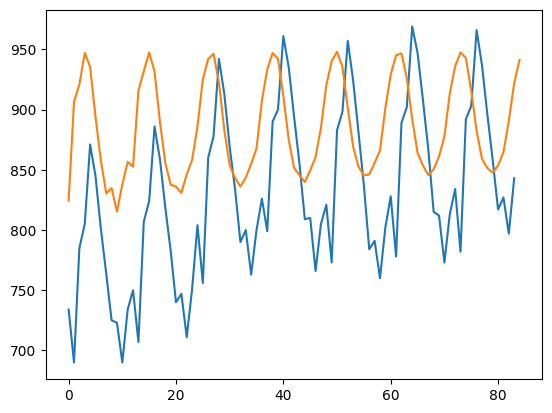

In [ ]:
plt.plot(df["truevalue"])
plt.plot(df["predictvalue"])
plt.show()